In [1]:
import numpy as np
import pandas as pd
import os, time, logging
from src.data import Hicmat, plot_data, preprocess_data
from src.tad_algo import TopDom, TADtree

In [5]:
folder = os.path.join('..', 'CHROMOSOMES', 'GM12878', '100kb')
data_path = os.path.join(folder, 'chr1_100kb.npy')
resolution=100000

In [4]:
preprocess_data(folder, resolution)

In [3]:
if not os.path.isfile(data_path):
    preprocess_data(folder, resolution)

In [4]:
hic_mat = Hicmat(data_path, resolution)

In [5]:
hic_mat.filter(threshold = 1)

c:\Users\llego\MEET-U\Team-SA1\src\data.py:57: RuntimeWarning: divide by zero encountered in log
  m = np.log(m)


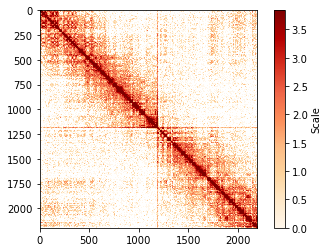

In [6]:
plot_data(hic_mat.reduced_matrix)

In [7]:
topdom = TopDom()
topdom_tads = topdom.getTADs(hic_mat, window=10)

TopDom Step 1 : Generating binSignals by computing bin-level contact frequencies
TopDom Step 2 : Detect TD boundaries based on binSignals
TopDom Step 3 : Statistical Filtering of false positive TD boundaries
TopDom : Exporting TADs


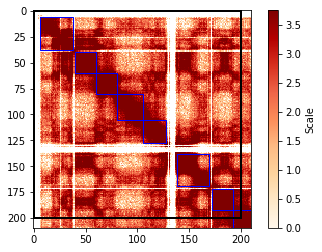

In [8]:
plot_data(hic_mat.original_matrix, region=(0,20000000), tads=topdom_tads, resolution=resolution)

In [9]:
tadtree = TADtree()
tadtree_tads = tadtree.getTADs(hic_mat)

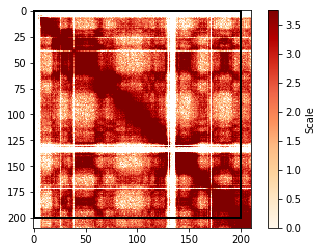

In [11]:
plot_data(hic_mat.original_matrix, region=(0,20000000), tads=tadtree_tads, resolution=resolution)